<a href="https://colab.research.google.com/github/Akashdeep-47/Python-Code/blob/master/Experiment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/sample_data/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['Income($)'] = scaler.fit_transform(df[['Income($)']])

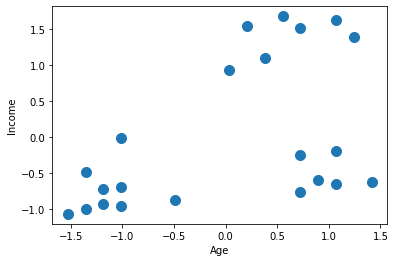

In [4]:
plt.scatter(df['Age'],df['Income($)'],s=100)
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [5]:
x = df[['Age','Income($)']]
x

,Age,Income($)
0,-1.356055,-0.480684
1,-1.009157,-0.010159
2,-1.009157,-0.692421
3,-1.182606,-0.715947
4,1.245679,1.401417
5,0.725332,1.519048
6,1.072230,1.636679
7,0.551883,1.683732
8,0.204985,1.542574
9,0.031536,0.930891


In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
ypred = km.fit_predict(x)
ypred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [7]:
x['Cluster'] = ypred
x

,Age,Income($),Cluster
0,-1.356055,-0.480684,0
1,-1.009157,-0.010159,0
2,-1.009157,-0.692421,0
3,-1.182606,-0.715947,0
4,1.245679,1.401417,1
5,0.725332,1.519048,1
6,1.072230,1.636679,1
7,0.551883,1.683732,1
8,0.204985,1.542574,1
9,0.031536,0.930891,1


In [8]:
centroids = km.cluster_centers_

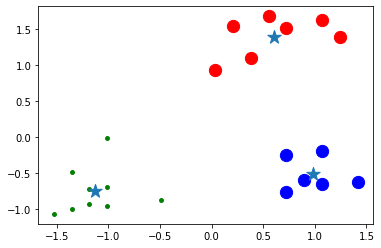

In [9]:
df1 = x[x['Cluster'] == 0]
df2 = x[x['Cluster'] == 1]
df3 = x[x['Cluster'] == 2]
plt.scatter(df1['Age'], df1['Income($)'], color='green', label="Cluster 1", s=15)
plt.scatter(df2['Age'], df2['Income($)'], color='red', label="Cluster 2", s=150)
plt.scatter(df3['Age'], df3['Income($)'], color='blue', label="Cluster 3", s=150)
plt.scatter(centroids[:,0], centroids[:,1], s=200, marker="*", label="Centroid")
plt.show()

In [10]:
#### Elbow Method
sse = []
for k in range(1,20):
 km = KMeans(n_clusters=k)
 km.fit(df[['Age','Income($)']])
 sse.append(km.inertia_)

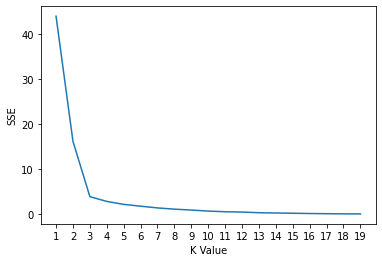

In [11]:
plt.xlabel("K Value")
plt.ylabel("SSE")
plt.xticks(range(1,20))
plt.plot(range(1,20),sse)
plt.show()